In [603]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import mglearn
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-notebook')
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [629]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [605]:
df.loc[df['Age'] < 10, 'Sex'] = 'Child'

<AxesSubplot:>

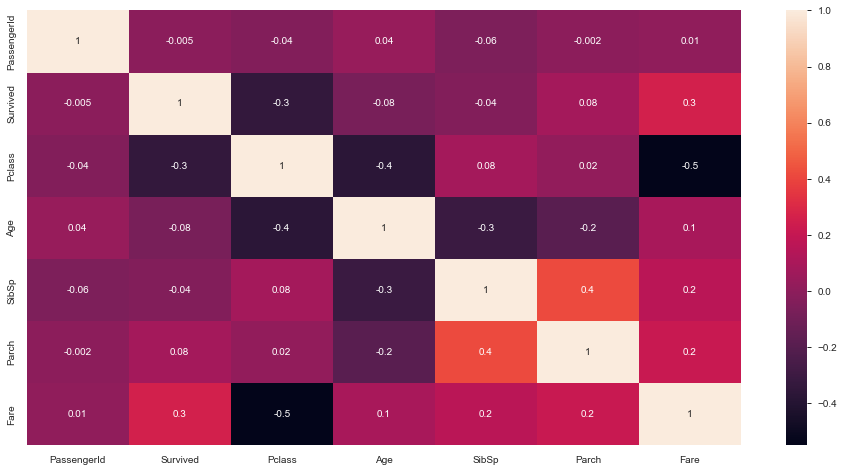

In [606]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot = True, fmt='.1g')

<AxesSubplot:xlabel='PassengerId', ylabel='Age'>

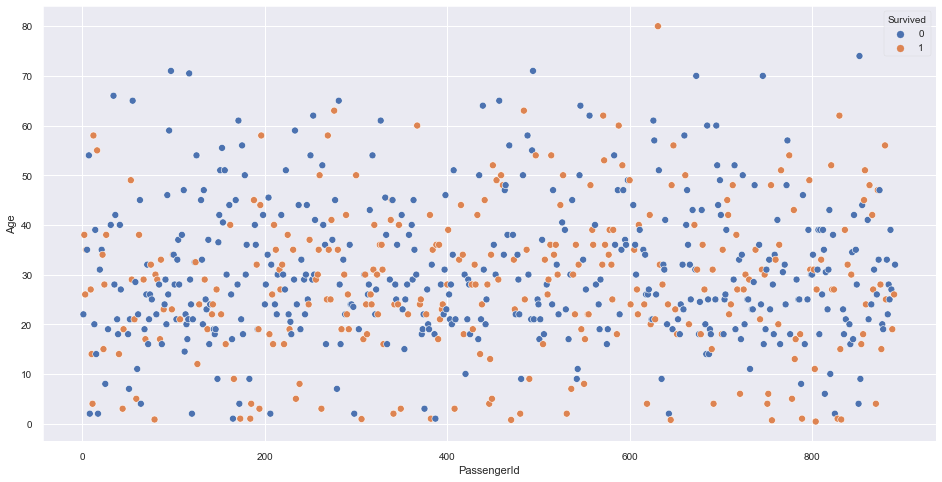

In [607]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df, x='PassengerId', y="Age", hue="Survived", palette="deep")

<AxesSubplot:xlabel='Age', ylabel='Sex'>

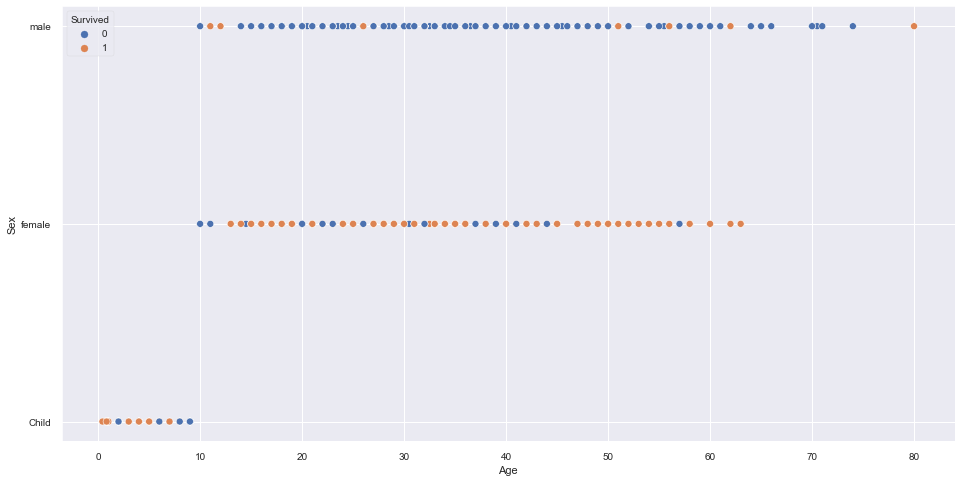

In [608]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df, x='Age', y="Sex", hue="Survived", palette="deep")

In [609]:
df[['Sex', 'Survived']][df.Survived == 1].groupby('Sex').count(), df[['Sex', 'Survived']][df.Survived == 0].groupby('Sex').count()

(        Survived
 Sex             
 Child         38
 female       214
 male          90,
         Survived
 Sex             
 Child         24
 female        70
 male         455)

<AxesSubplot:xlabel='Age', ylabel='Density'>

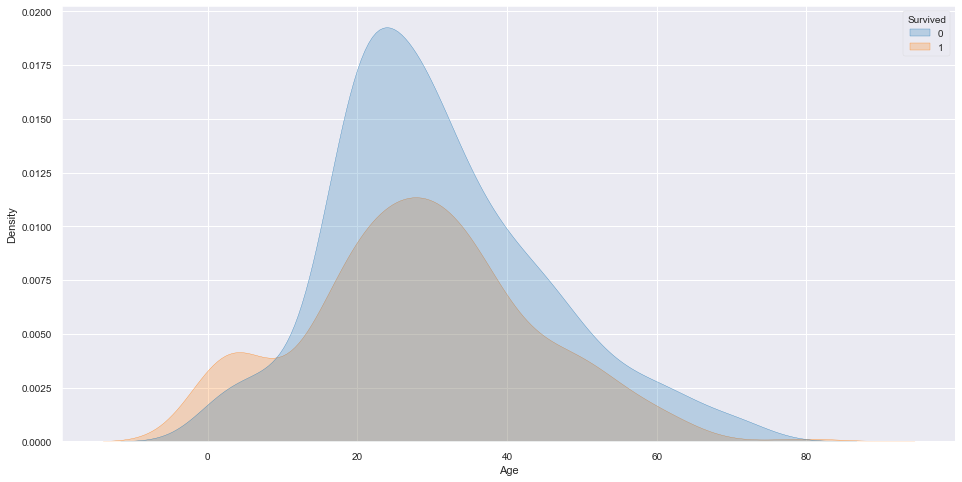

In [636]:
plt.figure(figsize=(16, 8))

sns.kdeplot(data=df,x='Age', shade=True, hue='Survived')


In [630]:
plt.figure(figsize=(16, 8))
sns.histplot(df['Age'], hue=df.Survived)

ValueError: The following variable cannot be assigned with wide-form data: `hue`

<Figure size 1152x576 with 0 Axes>

In [610]:
y = (df.Survived).astype('int')
X = df.drop(columns=['Survived'])

In [611]:
X.loc[X['Parch'] > 0, 'Parch'] = 1
X.loc[X['SibSp'] > 0, 'SibSp'] = 1

In [612]:
del_feat = ['PassengerId', 'Name', 'Cabin', 'Ticket', 'Parch', 'SibSp']

In [613]:
X = X.drop(columns=del_feat)
X['Age'] = X['Age'].fillna( X['Age'].median())
X['Fare'] = X['Fare'].fillna( X['Fare'].median())
X = pd.get_dummies(X, columns=['Pclass', 'Sex', 'Embarked'])

In [617]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=777)

In [618]:
clf = RandomForestClassifier(n_estimators=23).fit(X_train, y_train)
clf.score(X_test, y_test)

0.757847533632287